In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'errorbar.capsize':8})

time_measurements_df = pd.read_csv('Time_measurements.csv',\
                                   usecols=['original', 'loop_interchange_1', 'loop_interchange_2', 'loop_unrolling',\
                                           'loop_fusion', 'function_inlining', 'common_subexpression_elimination',\
                                            'strength_reduction', 'compiler_help'],\
                                   dtype='float32')
time_measurements_df.reset_index(drop=True, inplace=True)

In [12]:
time_measurements_df.describe()

,original,loop_interchange_1,loop_interchange_2,loop_unrolling,loop_fusion,function_inlining,common_subexpression_elimination,strength_reduction,compiler_help
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3.277581,2.283471,3.748571,2.610962,2.726982,1.542708,1.545695,1.542008,1.346424
std,0.010224,0.004763,0.311651,0.030775,0.027721,0.018308,0.012671,0.031866,0.004234
min,3.261570,2.274040,3.492840,2.565760,2.699520,1.500700,1.526570,1.491380,1.339520
25%,3.269370,2.280147,3.502390,2.588337,2.703693,1.532000,1.538703,1.522610,1.343457
50%,3.278475,2.285100,3.560135,2.605180,2.724285,1.549950,1.544695,1.541755,1.346550
75%,3.286065,2.287285,3.988085,2.632770,2.736565,1.552760,1.552372,1.552940,1.349297
max,3.291710,2.289090,4.283200,2.662280,2.785110,1.565470,1.568140,1.618210,1.353490


/home/gkoffas/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


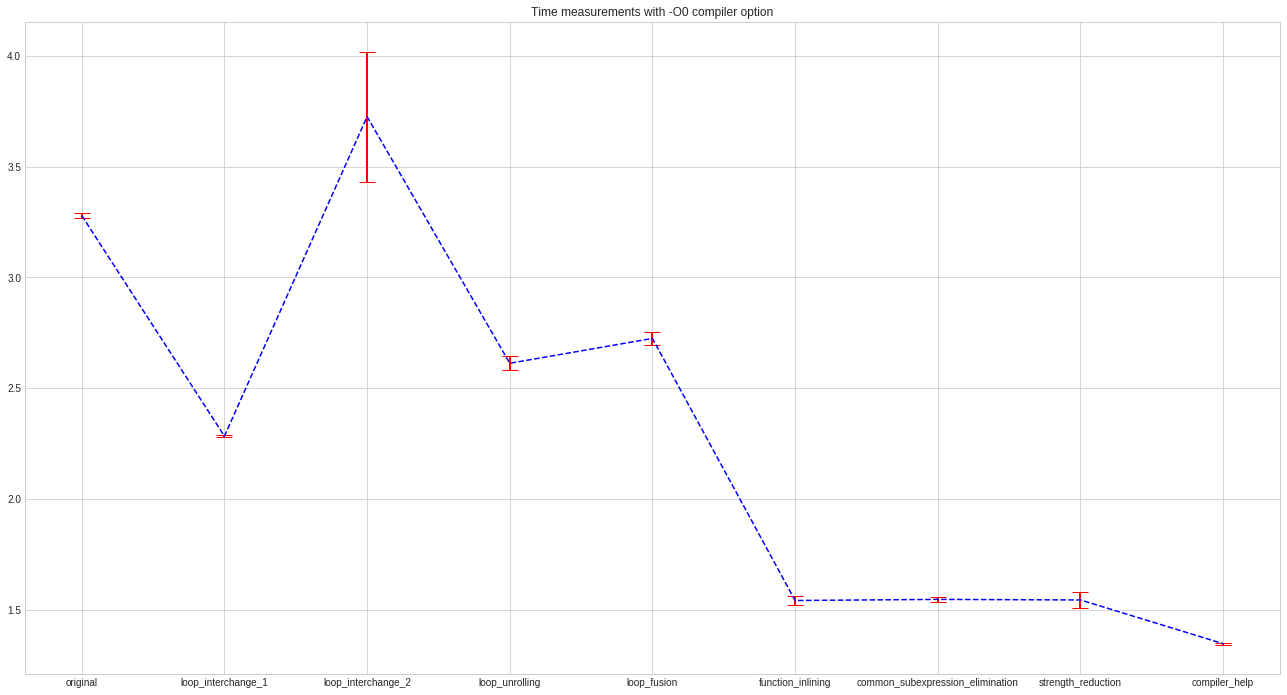

In [13]:
mean_list = []
std_list = []

for col in time_measurements_df.columns:
    temp_S = time_measurements_df.loc[1:len(time_measurements_df.index)-2][col]
    mean_list.append(temp_S.describe(include='all').loc['mean'])
    std_list.append(temp_S.describe(include='all').loc['std'])

metrics_df = pd.DataFrame({'mean' : mean_list, \
                           'std' : std_list})
metrics_df.reset_index(inplace=True)

metrics_df

fig = plt.figure(figsize=(22.5,12))
plt.style.use('seaborn-whitegrid')
plt.errorbar(metrics_df.index, metrics_df['mean'].values, fmt='b--', yerr=metrics_df['std'].values, \
             ecolor='r', elinewidth=2, capsize=8)
plt.xticks(range(len(metrics_df.index)))
plt.axes().set_xticklabels(time_measurements_df.columns)
plt.title('Time measurements with -O0 compiler option')
plt.show()

In [14]:
time_measurements_fast_df = pd.read_csv('Time_measurements.csv',\
                                   usecols=['original_fast', 'loop_interchange_fast_1', 'loop_interchange_fast_2', \
                                            'loop_unrolling_fast', 'loop_fusion_fast', 'function_inlining_fast', \
                                            'common_subexpression_elimination_fast', 'strength_reduction_fast', \
                                            'compiler_help_fast'],
                                   dtype='float32')
time_measurements_fast_df.reset_index(drop=True, inplace=True)

In [15]:
time_measurements_fast_df.describe()

,original_fast,loop_interchange_fast_1,loop_interchange_fast_2,loop_unrolling_fast,loop_fusion_fast,function_inlining_fast,common_subexpression_elimination_fast,strength_reduction_fast,compiler_help_fast
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.814941,0.056108,0.065119,0.072284,0.070994,0.070445,0.072776,0.071610,0.065437
std,0.005479,0.001315,0.001799,0.002895,0.002765,0.002180,0.004231,0.003267,0.006275
min,0.805709,0.054749,0.062188,0.066902,0.067165,0.067189,0.065282,0.066909,0.062104
25%,0.812009,0.055328,0.063601,0.070007,0.068981,0.068778,0.069755,0.069638,0.063253
50%,0.814525,0.055471,0.065602,0.072381,0.070879,0.070477,0.073247,0.070827,0.063689
75%,0.819001,0.056922,0.066490,0.074626,0.072830,0.071590,0.076222,0.074080,0.064030
max,0.823613,0.058729,0.067626,0.076349,0.076125,0.075220,0.078692,0.078308,0.085070


/home/gkoffas/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


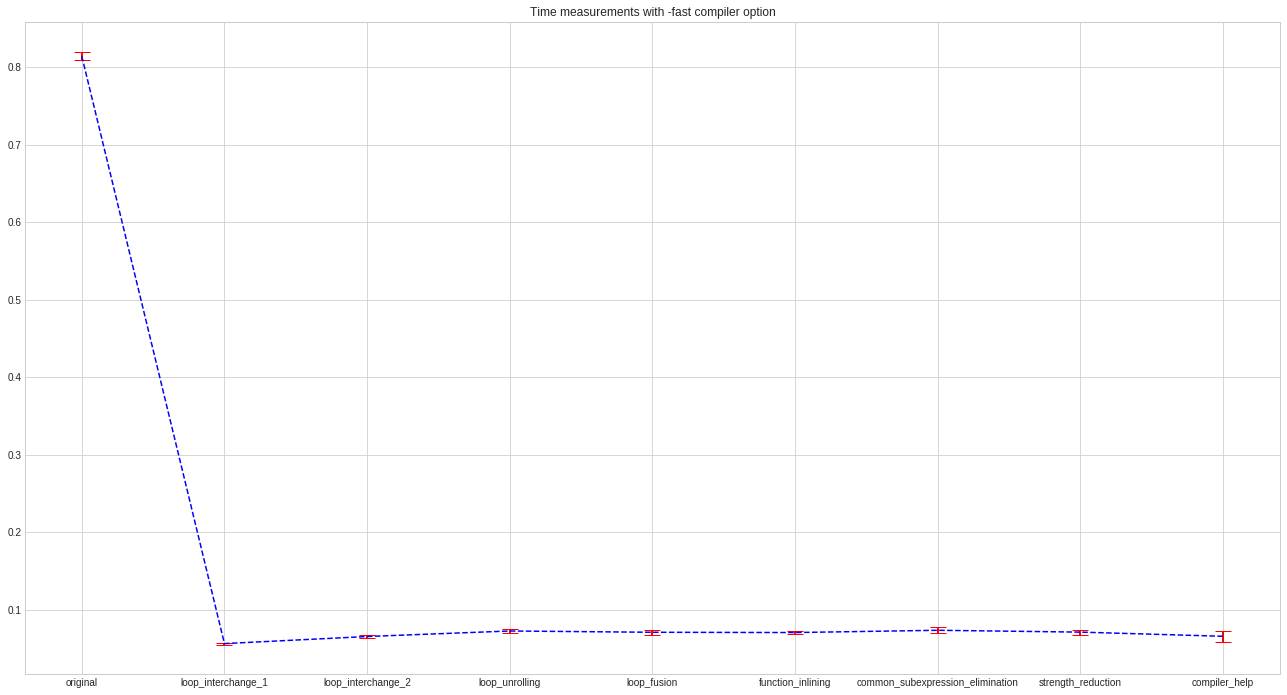

In [16]:
mean_list = []
std_list = []

for col in time_measurements_fast_df.columns:
    temp_S = time_measurements_fast_df.loc[1:len(time_measurements_fast_df.index)-2][col]
    mean_list.append(temp_S.describe(include='all').loc['mean'])
    std_list.append(temp_S.describe(include='all').loc['std'])

metrics_df = pd.DataFrame({'mean' : mean_list, \
                           'std' : std_list})
metrics_df.reset_index(inplace=True)

metrics_df

fig = plt.figure(figsize=(22.5,12))
plt.errorbar(metrics_df.index, metrics_df['mean'].values, fmt='b--', yerr=metrics_df['std'].values, \
             ecolor='r', elinewidth=2, capsize=8)
plt.xticks(range(len(metrics_df.index)))
plt.axes().set_xticklabels(time_measurements_df.columns)
plt.title('Time measurements with -fast compiler option')
plt.show()